In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00583.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00683.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00750.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00652.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00895.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00686.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00622.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00291.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00944.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00082.jpg
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00955.jpg
/kaggle/input/animal-image-datas

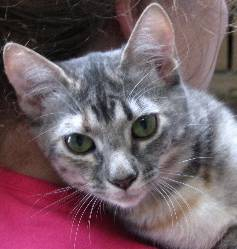

In [3]:
from IPython.display import Image
Image(filename = '/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs/dogs_00583.jpg')
Image(filename ='/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/panda/panda_00875.jpg')
Image(filename = '/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/cats/cats_00236.jpg')

In [4]:
import tensorflow as tf
import keras as k

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
classifier = Sequential()

In [7]:
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [10]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
classifier.add(Flatten())

In [12]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

In [13]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   fill_mode='nearest' )

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                    validation_split=0.2)

In [26]:
training_set = train_datagen.flow_from_directory('/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

validation_set = validation_datagen.flow_from_directory('/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        subset='validation')


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [28]:
classifier.fit(
    training_set,
    steps_per_epoch=2400 // 32,  
    epochs=5,
    validation_data=validation_set,
    validation_steps= 600 // 32  
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.6122 - loss: 0.7654 - val_accuracy: 0.6042 - val_loss: 0.8223
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5417 - val_loss: 0.8763
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.6581 - loss: 0.6973 - val_accuracy: 0.6649 - val_loss: 0.7044
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 0.6356
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.6740 - loss: 0.6804 - val_accuracy: 0.5747 - val_loss: 0.9395


In [20]:
from keras.preprocessing import image

test_image = image.load_img('/kaggle/input/animal-image-datasetdog-cat-and-panda/images/panda.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0 

result = classifier.predict(test_image)

print(result)  

predicted_class_index = np.argmax(result, axis=1)[0]

class_labels = list(training_set.class_indices.keys()) 
predicted_class = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[8.1568515e-07 8.6299860e-06 9.9999058e-01]]
Predicted class: panda


In [21]:
# sem data augmentation
loss, accuracy = classifier.evaluate(validation_set)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6022 - loss: 0.9615
Validation Loss: 0.9388483762741089
Validation Accuracy: 0.6133333444595337


In [29]:
# com Data Augmentation
# houve uma pequena mudança
loss, accuracy = classifier.evaluate(validation_set)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5591 - loss: 0.9402
Validation Loss: 0.9426547288894653
Validation Accuracy: 0.574999988079071


# Regularização: teve uma boa melhora no loss e na acurácia

In [31]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)  
predictions = Dense(3, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=2400 // 32,
    epochs=5,
    validation_data=validation_set,
    validation_steps=600 // 32
)

loss, accuracy = model.evaluate(validation_set)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 845ms/step - accuracy: 0.4960 - loss: 2.6830 - val_accuracy: 0.6215 - val_loss: 1.4109
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7083 - val_loss: 1.3083
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 836ms/step - accuracy: 0.6413 - loss: 1.3059 - val_accuracy: 0.7083 - val_loss: 1.0475
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.1775
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 839ms/step - accuracy: 0.6723 - loss: 1.0641 - val_accuracy: 0.7083 - val_loss: 0.9051
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 635ms/step - accuracy: 0.6856 - loss: 0.9141
Validation Loss: 0.9011887907981873
Validation Accuracy: 0.7099999785423279


# Houve uma melhora significante com Transfer Learning

In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    training_set,
    steps_per_epoch=2400 // 32,
    epochs=5,
    validation_data=validation_set,
    validation_steps=600 // 32
)

loss, accuracy = model.evaluate(validation_set)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 839ms/step - accuracy: 0.5276 - loss: 0.9346 - val_accuracy: 0.7153 - val_loss: 0.6483
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7917 - val_loss: 0.5689
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 832ms/step - accuracy: 0.7065 - loss: 0.6602 - val_accuracy: 0.7361 - val_loss: 0.5933
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.4048
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 831ms/step - accuracy: 0.7305 - loss: 0.6002 - val_accuracy: 0.7240 - val_loss: 0.6004
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 637ms/step - accuracy: 0.7259 - loss: 0.6161
Validation Loss: 0.6083593964576721
Validation Accuracy: 0.7183333039283752
